# KÜTÜPHANE VE AYARLAMALAR

In [ ]:
# ################# I M P O R T S ################# #
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, \
    validation_curve, RepeatedKFold, RepeatedStratifiedKFold

import lightgbm as ltb
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import joblib
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm

from time import time

# ################# S E T T I N G S ################# #
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
df=pd.read_csv(r"data/step6_encoded.csv")

In [ ]:
# Rasgele 8 gözlem seçip gözlemleyelim
df.sample(8).sort_index()

In [ ]:
# Tüm değişkenleri görelim
df.columns

# MODEL SEÇİMİ

## Modeller Hakkında Bilgi

**Linear Regression Methods**

If we have very few features on a data-set and the score is poor for both training and test set then it’s a problem of under-fitting. On the other hand if we have large number of features and test score is relatively poor than the training score then it’s the problem of over-generalization or over-fitting. Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.

**Ridge Regression :** In ridge regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients.

**Lasso Regression :** Lasso stands forleast absolute shrinkage and selection operator. The only difference from Ridge is instead of taking the square of the coefficients, magnitudes are taken into account. This type of regularization (L1) can lead to zero coefficients i.e. some of the features are completely neglected for the evaluation of output. So Lasso regression not only helps in reducing over-fitting but it can help us in feature selection.

**Elastic Net regression**: The elastic net algorithm uses a weighted combination of L1 and L2 regularization.

## Model Başarı Metriklerini Karşılaştırma

**İlk olarak bağımlı ve bağımsız değişkenlerimizi belirliyoruz.**

In [ ]:
# Bağımlı değişkeni dışarıda bırakıp geride kalan tüm (bağımsız) değişkenleri bir df'e atayalım
X = df.drop("SALARY_AVG_TL", axis=1)

# Bağımlı değişkenimizi ayrı bir df'e atayalım
y = df[["SALARY_AVG_TL"]].values.ravel()

It is always a good idea to seperate the test set and training set, even while using cross_val_score. The reason behind this is knowledge leaking. It basically means that when you use both training and test sets, you are leaking information from test set into your model, thereby making your model biased, leading to incorrect predictions.

**Farklı modellerin başarı/hata skorlarına bakmak için ilk önce veri setini iki parçaya ayırmak daha doğru bir yaklaşım olacaktır.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=137)

In [ ]:
# BİRDEN ÇOK MODELİN R KARE DEGERLERİNE BAKALIM
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor()),
          ("CatBoost", CatBoostRegressor(verbose=False))]

rsqr_scr = list()
rmse_scr = list()

for name, regressor in models:
    rsqr = np.mean(cross_val_score(regressor,
                                   X_train,
                                   y_train,
                                   cv=10,
                                   scoring="r2")) # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    rsqr_scr.append(round(rsqr, 4))

In [ ]:
# BİRDEN ÇOK MODELİN RMSE DEGERLERİNE BAKALIM
for name, regressor in models:
    rmse = np.mean((-1) * cross_val_score(regressor,
                                            X_train,
                                            y_train,
                                            cv=10,
                                            scoring='neg_root_mean_squared_error')) # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    rmse_scr.append(round(rmse, 4))

In [ ]:
model_names = [name for name, regressor in models]
scr_dict = {"R SQUARE": rsqr_scr, "RMSE": rmse_scr}
mod_comp_df = pd.DataFrame(data=scr_dict, index=model_names)
mod_comp_df

In [ ]:
df['SALARY_AVG_TL'].mean()

In [ ]:
df['SALARY_AVG_TL'].std()

# SEÇİLEN MODELLER İLE UYGULAMA

- LINEAR REGRESSION
- RANDOM FOREST REGRESSOR
- GRADIENT BOOSTING REGRESSOR
- LGBM REGRESSOR
- CATBOOST REGRESSOR

## MODEL UYGULAMA İŞLEM BASAMAKLARI

1. Model kurma
2. İlk model başarı değerlendirme
3. Hiperparametre optimizasyonu
4. Final model başarı değerlendirme
6. Tahmin
5. Sonuç

## A) LINEAR REGRESSION

### 1. Model Kurma

Birden çok bağımsız değişkenimiz olduğundan Çoklu Doğrusal Regresyon yöntemini kullanmalıyız.

In [ ]:
# Bağımlı değişkeni dışarıda bırakıp geride kalan tüm (bağımsız) değişkenleri bir df'e atayalım
X = df.drop("SALARY_AVG_TL", axis=1)

# Bağımlı değişkenimizi ayrı bir df'e atayalım
y = df[["SALARY_AVG_TL"]]

In [ ]:
# Veri setini train (%80) ve test (%20) şeklinde iki parçaya ayır.
# Her çalıştırdığımızda aynı değerleri almak için random_state değerini set ettik.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1023)

In [ ]:
# train seti bağımsız değişkenleri
X_train.shape

In [ ]:
# train seti bağımlı değişkeni
y_train.shape

In [ ]:
# test seti bağımsız değişkenleri
X_test.shape

In [ ]:
# test seti bağımlı değişkeni
y_test.shape

In [ ]:
# Modelimizi kuralım
reg_model = LinearRegression().fit(X_train, y_train)

In [ ]:
# sabit (b = bias = beta = intercept) -> Doğrunun y eksenini kestiği nokta
reg_model.intercept_[0] # Döndürdüğü tek elemanlı diziden ilk elemanı göster; 75839.29781

In [ ]:
# Katsayılar - coefficients (w - weights)
reg_model.coef_

### 2. Tahmin

In [ ]:
# Veri setinden rasgele bir gözlem birimi seçelim
ran_obs = df.sample(1)
ran_obs

In [ ]:
# DF değil de liste şeklinde verileri göndermek istersek. DİKKAT: Liste 2D olmalı -> Numpy array !
tahmin_liste = ran_obs.to_numpy()

In [ ]:
# Değişken sayısı ile listedeki değer sayısı eşleşiyor mu, kontrol edelim
tahmin_liste.shape

In [ ]:
# Liste değerleri
tahmin_liste

In [ ]:
# Listenin son elemanı bizim hedef değişkenimiz. Onu çıkarmamız gerek
tahmin_liste = np.delete(tahmin_liste, 32, axis=1)

In [ ]:
tahmin_liste

In [ ]:
tahmin_liste.shape

In [ ]:
duz_liste = [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0]

In [ ]:
arr = np.array([duz_liste])
arr.shape

In [ ]:
arr

In [ ]:
# Hedef değişken hariç diğerlerine ait gözlem değerlerini alalım
ran_obs_ind = ran_obs.loc[:, df.columns != 'SALARY_AVG_TL']
ran_obs_ind

In [ ]:
# Bu gözlem birimi için tahmin işlemi yapalım
pred_val = int(reg_model.predict(ran_obs_ind))
pred_val_from_list = int(reg_model.predict(tahmin_liste))

In [ ]:
ran_obs_ind.columns

In [ ]:
# Sonuçları mukayese edelim
print(f"ACTUAL VALUE\t\t: {int(ran_obs['SALARY_AVG_TL'].values)}")
print(f"PREDICTED VALUE\t\t: {pred_val}")
print(f"PREDICTED VALUE (from a list): {pred_val_from_list}")

### 3. Model Başarı Değerlendirme

R Square/Adjusted R Square is better used to explain the model to other people because you can explain the number as a percentage of the output variability. MSE, RMSE, or MAE are better be used to compare performance between different regression models. Personally, I would prefer using RMSE and I think Kaggle also uses it to assess the submission. However, it makes total sense to use MSE if the value is not too big and MAE if you do not want to penalize large prediction errors.

Adjusted R square is the only metric here that considers the overfitting problem. R Square has a direct library in Python to calculate but I did not find a direct library to calculate Adjusted R square except using the statsmodel results. If you really want to calculate Adjusted R Square, you can use statsmodel or use its mathematic formula directly.

In [ ]:
# Train RMSE
y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))    # 17541.17259

In [ ]:
# TRAIN R-Kare
reg_model.score(X_train, y_train)   # 0.63890

Bağımsız değişkenler hedef değişkeni %64 oranında temsil edebiliyor. Train seti için kötü bir skor

In [ ]:
# Test RMSE; Train seti üzerinden kurduğumuz modeli test seti üzerinde kullanıp ort hata miktarına bakıyoruz
y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))     # 18341.33874

*Test hatası train hatasından beklenilidği gibi daha yüksek çıktı.*

In [ ]:
# TEST R-Kare
reg_model.score(X_test, y_test)   # 0.6452

Test seti üzerinde predictor değişkenler %65 oranında hedef değişkenimizi temsil edebiliyor. Regresyon problemi olduğunu düşünürsek çok kötü bir skor değil. Ancak daha iyi bir hale getirmek için çalışacağız.

**R Square/Adjusted R Square**

R Square is calculated by the sum of squared of prediction error divided by the total sum of the square which replaces the calculated prediction with mean. R Square value is between 0 to 1 and a bigger value indicates a better fit between prediction and actual value.

R Square is a good measure to determine how well the model fits the dependent variables. However, it does not take into consideration of overfitting problem. If your regression model has many independent variables, because the model is too complicated, it may fit very well to the training data but performs badly for testing data. That is why Adjusted R Square is introduced because it will penalize additional independent variables added to the model and adjust the metric to prevent overfitting issues.

Modelimizin çok sayıda bağımsız değişkeni yok. Ayrıca overfitting de sözkonusu değil. Ancak yine de düzeltilmiş R-Kare değerine de bakalım.

In [ ]:
X = df.drop("SALARY_AVG_TL", axis=1)
y = df[["SALARY_AVG_TL"]]

X_addC = sm.add_constant(X)
model = sm.OLS(y, X_addC).fit()

# display adjusted R-squared
print('Adjusted R Square\t: %.5f' % model.rsquared_adj)   # 0.63904
print('R Square\t\t: %.5f' % model.rsquared)   # 0.64133

Bağımsız değişkenler hedef değişkeni %64 oranında temsil edebiliyor. Çok kötü bir oran değil.
Train-test şeklinde veri setini ayırmak yerine burada bütün veri seti üzerinden bu değerler hesaplandı.
Dikkat edilecek diğer bir husus, train-test ile veriyi iki parçaya ayırdığımızda gözlemlerin dağılımına göre model başarısı da biraz değişkenlik gösterecektir. Çünkü veri setimiz zaten çok küçük ve biz onu daha küçük parçalara ayırıyoruz.

In [ ]:
# Bağımsız değişkenler ile birlikte X_addC veri setine eklenen 'const' sütununa bakalım
X_addC[['const']]

In [ ]:
# Train seti bağımsız değişkenlerinin hangi gözlemlerden oluştuğunu merak ediyorsanız ..
X_train.head(10).sort_index()

### (Ekstra) 10 Katlı CV ile R Kare Hesaplama

Az önce belirttiğimiz gibi, train - test şeklinde veri setinin ikiye ayrılması model başarı skorunun doğruluğunu tehlikeye atabilir. Bu riski bertaraf etmek için 10-folded Cross Validation yöntemiyle R-Kare metriğimizi hesaplayacağız.

In [ ]:
np.mean(cross_val_score(reg_model,
                        X,         # Bağımsız değişkenler
                        y,         # Bağımlı değişken
                        cv=10,
                        scoring='r2'))
# 0.63019

Ortalama R-Kare değeri %63 çıktı. Daha önceki değer ile hemen hemen aynı. Ancak fark çok az da olsa burada elde edileni baz almak daha isabetli olacaktır.

**RMSE**

- N Katlı Cross Validation ile modelimizin ortalama RMSE değerine bakacağız.
- CV negatif değerler döndüreceği için - ile çarpıp değerleri pozitif yaptık
- cross_val_score normalde MSE değerleri verir. RMSE istediğimiz için elde edilen değerlerin kareköklerini aldık.
- Ayrıca veri setimiz zaten küçük olduğundan iki parçaya ayırmamayı tercih ettik

In [ ]:
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,         # Bağımsız değişkenler
                                 y,         # Bağımlı değişken
                                 cv=5,
                                 scoring="neg_mean_squared_error")))
# 17828.1512

**MAE**

In [ ]:
mean_absolute_error(y_test, y_pred)     # 8470.20

### 4. Hiperparametre Optimizasyonu

Hyper-parameters by definition are input parameters which are necessarily required by an algorithm to learn from data.

For basic straight line linear regression, there are no hyperparameter.

In [ ]:
reg_model.get_params()

Bu nedenle optimizasyon işlemi için daha önce oluşturduğumuz doğrusal regresyon modelimizi kullanamayız. Onun yerine yine birer LR yöntemi olan **Ridge()** ya da **Lasso()** yöntemlerini kullanabiliriz.

Burada Lasso yöntemini kullanacağız.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1023)

las_model = Lasso()
las_model.fit(X_train, y_train)

In [ ]:
# sabit (b = bias = beta = intercept) -> Doğrunun y eksenini kestiği nokta
las_model.intercept_[0]     # 75906.59664; Önceki değer: 75839.29781

In [ ]:
# Her bir değişken için katsayılar - coefficients (w - weights)
las_model.coef_

### 5. Model Başarı Değerlendirme

In [ ]:
# Train RMSE
y_pred = las_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))    # 17541.23100; Önceki: 17541.17259

In [ ]:
# TRAIN R-Kare
las_model.score(X_train, y_train)   # 0.63890; Önceki: 0.63890 (AYNI)

Bağımsız değişkenler hedef değişkeni %64 oranında temsil edebiliyor. Train seti için kötü bir skor

In [ ]:
# Test RMSE; Train seti üzerinden kurduğumuz modeli test seti üzerinde kullanıp ort hata miktarına bakıyoruz
y_pred = las_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))     # 18339.57595; Önceki: 18341.33874

*Test hatası train hatasından beklenilidği gibi daha yüksek çıktı.*

In [ ]:
# TEST R-Kare
las_model.score(X_test, y_test)   # 0.6453; Önceki: 0.6452

### 6. SONUÇ

Standart doğrusal modelimizi geliştirmek için kullandığımız Lasso Regression yöntemi model başarımızı artırma konusunda pek yardımcı olamadı.

Diğer yöntemlere de bakmamız gerekiyor.

## B) CATBOOST REGRESSOR

### 1. Model Kurma

**Setup the Data for regressor**

In [ ]:
# Bağımlı değişkeni dışarıda bırakıp geride kalan tüm (bağımsız) değişkenleri bir df'e atayalım
X = df.drop("SALARY_AVG_TL", axis=1)

# Bağımlı değişkenimizi ayrı bir df'e atayalım
y = df[["SALARY_AVG_TL"]]

In [ ]:
# Veri setini train (%80) ve test (%20) şeklinde iki parçaya ayır.
# Her çalıştırdığımızda aynı değerleri almak için random_state değerini set ettik.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1023)

In [ ]:
# Here, we are using CatBoostRegressor as a Machine Learning model to fit the data.
model_CBR = CatBoostRegressor(verbose=False)
model_CBR.fit(X_train, y_train)

# CatBoost metodu fit edilen bir modelde hiperparametre kabul etmiyor. Onun için ikinci bir model kurup fit etmeden bırakıyorum
model_CBR_new = CatBoostRegressor(verbose=False)

### 2. İlk Model İçin Başarı Değerlendirme

In [ ]:
# Now we have predicted the output by passing X_test and also stored real target in expected_y.
expected_y  = y_test                   
predicted_y = model_CBR.predict(X_test)

In [ ]:
# Here we have printed r2 score and mean squared log error for the Regressor.
print("R SQUARE:", r2_score(expected_y, predicted_y))
print("MSE\t:", np.sqrt(mean_squared_error(expected_y, predicted_y)))

# R SQUARE  : 0.5632
# MSE	    : 20349.9524

### 3. Hiperparametre Optimizasyonu

Modeli fit ettikten sonra parametrelerini değiştirmemize izin vermiyor.
Bunun için en iyi parametreleri bulup bu değerlerle modelimizi kuracağız.

*Model iyileştirme için kullanacağımız parametrelerin varsayılan değerleri:*
- 'depth': 6,
- 'learning_rate': 0.05,
- 'iterations': 1000

Her bir parametre için bu değerleri de içeren ve bu değerlere yakın parametre listeleri oluşturup en iyilerini bulmaya çalışacağız.

In [ ]:
parameters = {'depth'         : [4, 8, 10, 12],
              'learning_rate' : [0.01, 0.05, 0.1],
              'iterations'    : [5, 10, 20, 30, 50, 100, 500, 1000]
             }

**Using GridSearchCV and Printing Results**

Before using GridSearchCV, lets have a look on the important parameters.

- estimator: In this we have to pass the models or functions on which we want to use GridSearchCV
- param_grid: Dictionary or list of parameters of models or function in which GridSearchCV have to select the best.
- Scoring: It is used as a evaluating metric for the model performance to decide the best hyperparameters, if not especified then it uses estimator score.
- cv : In this we have to pass a interger value, as it signifies the number of splits that is needed for cross validation. By default is set as five.
- n_jobs : This signifies the number of jobs to be run in parallel, -1 signifies to use all processor.

In [ ]:
# Making an object grid_GBC for GridSearchCV and fitting the dataset i.e X and y
grid = GridSearchCV(estimator=model_CBR,    # Model object
                    param_grid = parameters,
                    cv = 2,     # Number of folds for Cross Validation 
                    n_jobs=-1)  # Use all processors to maximize performance

grid.fit(X_train, y_train)

In [ ]:
# Now we are using print statements to print the results. It will give the values of hyperparameters as a result.
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)

**Best Parameters**

- 'depth': 10,
- 'iterations': 5,
- 'learning_rate': 0.01

In [ ]:
# İkinci modele en iyi parametre değerlerini verelim
model_CBR_new.set_params(**grid.best_params_, random_state=17).fit(X, y)

In [ ]:
# Şimdi fit edebiliriz
model_CBR_new.fit(X_train, y_train)

### 3. Final Model Başarı Değerlendirme

In [ ]:
# Now we have predicted the output by passing X_test and also stored real target in expected_y.
expected_y  = y_test                   
predicted_y = model_CBR_new.predict(X_test)

In [ ]:
# Here we have printed r2 score and mean squared log error for the Regressor.
print("R SQUARE:", r2_score(expected_y, predicted_y))
print("MSE\t:", np.sqrt(mean_squared_error(expected_y, predicted_y)))

### 4. Sonuç

CatBoostRegressor modelinin [sitesinde](https://catboost.ai) de belirtildiği gibi kategorik değişkenleri One Hot Encoding yöntemiyle sayısal değerlere dönüştürmek iyi sonuçlar vermeyebiliyor. Burada hiperparametre optimizasyonu yaptıktan sonra başarı skoru ciddi bir şekilde azalıp hata değeri arttı. Dolayısıyla bu yöntemi kullanmak istiyorsak modelin ilk halini almalıyız.

### Variable Importance Plot for CatBoost

In [ ]:
sorted_feature_importance = model_CBR.feature_importances_.argsort()
plt.barh(df.columns[sorted_feature_importance], 
        model_CBR.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

## C) GRADIENT BOOSTING REGRESSOR

### 1. Model Kurma

In [ ]:
df=pd.read_csv(r"data/step6_encoded.csv")

# Bağımlı değişkeni dışarıda bırakıp geride kalan tüm (bağımsız) değişkenleri bir df'e atayalım
X = df.drop("SALARY_AVG_TL", axis=1)

# Bağımlı değişkenimizi ayrı bir df'e atayalım
y = df[["SALARY_AVG_TL"]]

In [ ]:
# Veri setini train (%80) ve test (%20) şeklinde iki parçaya ayır.
# Her çalıştırdığımızda aynı değerleri almak için random_state değerini set ettik.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=47)

In [ ]:
# Modeli train seti üzerinde kuralım
gbr_model = GradientBoostingRegressor(random_state=70)
gbr_model.fit(X_train, y_train.values.ravel())

### 2. İlk Model Başarısını Değerlendirme

In [ ]:
# Train RMSE
y_pred = gbr_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))    # 15569.20234

In [ ]:
# TRAIN R-Kare
gbr_model.score(X_train, y_train)   # 0.72

*R Kare değeri gayet iyi. Ancak bu train seti puanı. Bir de test seti için skorlara bakalım.*

In [ ]:
# Test RMSE; Train seti üzerinden kurduğumuz modeli test seti üzerinde kullanıp ort hata miktarına bakıyoruz
y_pred = gbr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))     # 19045.10860

*Beklenileceği üzere, RMSE değeri train setine göre artmış*

In [ ]:
# TEST R-Kare
gbr_model.score(X_test, y_test)   # 0.604

*R-Kare değeri train setine göre çok düştü!*

### 3. Hiperparametre Optimizasyonu

In [ ]:
# Varsayılan değerler
gbr_model.get_params()

Modelimizin tahmin başarısını artırmak adına şu parametrelerin varsayılan değerlerini değiştirebiliriz:
- n_estimators: 100
- max_depth: 3
- learning_rate: 0.1
- min_samples_split: 2
- subsample: 1.0

Her bir parametre için bu değerleri de içeren ve bu değerlere yakın parametre listeleri oluşturup en iyilerini bulmaya çalışacağız.

In [ ]:
parameters = {'n_estimators'        : [50, 100, 150, 500, 750, 1000],
              'max_depth'           : [1, 3, 5, 7, 10],
              'learning_rate'       : [0.01, 0.05, 0.1],
              'min_samples_split'   : [0.1, 0.3, 0.5, 0.7, 0.8, 1.0],
              'subsample'           : [0.5, 0.7, 1.0]
             }

In [ ]:
# Making an object grid_GBC for GridSearchCV and fitting the dataset i.e X and y
grid = GridSearchCV(estimator=gbr_model,    # Model object
                    param_grid = parameters,
                    cv = 2,     # Number of folds for Cross Validation 
                    n_jobs=-1)  # Use all processors to maximize performance

grid.fit(X_train, y_train.values.ravel())

In [ ]:
# Now we are using print statements to print the results. It will give the values of hyperparameters as a result.
print(" - - - - Results from Grid Search - - - - " )
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)

**Bulunan En İyi Parametre Değerleri**

In [ ]:
grid.best_params_

In [ ]:
# Modeli en iyi parametre değerleri ile tekrar fit edelim
gbr_model.set_params(**grid.best_params_, random_state=17).fit(X, y.values.ravel())

In [ ]:
# Bakalım yeni parametreler modelimize uygulanmış mı
gbr_model.get_params()  # BİNGO !

### 4. Final Model Başarı Değerlendirme

Bakalım yaptığımız değişiklikler model başarısını nasıl etkilemiş

In [ ]:
# Test RMSE;
y_pred = gbr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))     # 18207.256215

Önceki değer 19045.10860 idi. Bir miktar iyileşme var.

In [ ]:
# TEST R-Kare
gbr_model.score(X_test, y_test)   # 0.64

Önceki değer %60 idi. Eskisine nazaran daha iyi bir temsil değeri.

**10 Katlı CV ile R Kare Hesaplama**

**RMSE**

In [ ]:
np.mean(np.sqrt(-cross_val_score(gbr_model,
                                 X,                     # Bağımsız değişkenler
                                 y.values.ravel(),      # Bağımlı değişken
                                 cv=5,
                                 scoring="neg_mean_squared_error")))
# 17616.7530

**R Kare**

In [ ]:
np.mean(cross_val_score(gbr_model,
                        X,                      # Bağımsız değişkenler
                        y.values.ravel(),       # Bağımlı değişken
                        cv=10,
                        scoring='r2'))
# 0.64

### 5. Tahmin

In [ ]:
# Veri setinden rasgele bir gözlem birimi seçelim
ran_obs = df.sample(1)
ran_obs

In [ ]:
# Hedef değişken hariç diğerlerine ait gözlem değerlerini alalım
ran_obs_ind = ran_obs.loc[:, df.columns != 'SALARY_AVG_TL']
ran_obs_ind

In [ ]:
# Bu gözlem birimi için tahmin işlemi yapalım
pred_val = int(gbr_model.predict(ran_obs))

In [ ]:
# Sonuçları mukayese edelim
print(f"ACTUAL VALUE\t: {int(ran_obs['SALARY_AVG_TL'].values)}")
print(f"PREDICTED VALUE\t: {pred_val}")

Son olarak gerçek değerler ile tahmin değerlerini ayrı bir veri setinde birleştirelim

In [ ]:
df_final = pd.DataFrame()   # Yeni bir df tanımla
df_final["ACTUAL_AVG_TL"] = df["SALARY_AVG_TL"]     # Gerçek değerleri bir değişken olarak ekle

In [ ]:
# Tüm gözlem birimleri için tahmin işlemi yapıp sonuçları sakla
y_pred_all = gbr_model.predict(X)

In [ ]:
# Veri setine bu tahmin değerlerini ikinci bir değişken olarak ekle
df_final["PREDICTED_AVG_TL"] = y_pred_all

In [ ]:
# Bu veri setinden rasgele 20 gözlemlik bir örneklem al, indekse göre sıralayarak göster
df_final.sample(20).sort_index()

### 6. Sonuç

İlk haliyle başarı oranı (R-Kare skoru) %60 olan modelimizi hiperparametre optimizasyonu yaparak %64'e çıkardık.

Her ne kadar bir model için düşük başarı skorları gibi görünse de hedef değişkenimizin sürekli sayısal bir değer olduğu ve bağımsız değişkenlerin onu temsil etmede çok çelişkili davrandığı gözden kaçırılmamalıdır.

Ancak biz gene bu netice ile yetinmeyip son olarak LightGBM modelini de teste tabi tutacağız.

## D) LIGHTGBM REGRESSOR

**What is LightGBM?**

The LightGBM is short for Light Gradient Boosting Machine. It is a supervised boosting algorithm that works in a similar way as the XGBoost algorithm does but with some advanced features that makes it more powerful and fast.

Similar to the XGBoost algorithm, we don’t need to handle the NULL value explicitly in the data preprocessing step while using the LightGBM algorithm as it also handles NULL values automatically.

Other important features that make LightGBM different from other boosting algorithms is that it uses a histogram-based algorithm for the splitting of nodes and Gradient-Based One Side Sampling (GOSS) for the sampling.

### 1. Model Kurma

In [3]:
X = df.drop("SALARY_AVG_TL", axis=1)    # Bağımsız değişkenler
y =df['SALARY_AVG_TL']                  # Bağımlı değişken

In [4]:
# Train - Test seti
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [5]:
lgbm_model = LGBMRegressor().fit(X_train, y_train)    # Modeli train seti üzerinde fit et

y_pred = lgbm_model.predict(X_test)                   # Test seti için tahmin iste
y_pred

array([ 9388.07256206,  9250.36039128,  9646.13871807, ...,
       18146.64406936, 15153.91687474,  9839.51216048])

### 2. İlk Model Başarısını Değerlendirme

The best way to see the performance of the model is to visualize the actual and the predicted values. We will use the matplotlib module to visualize the actual and the predicted values.

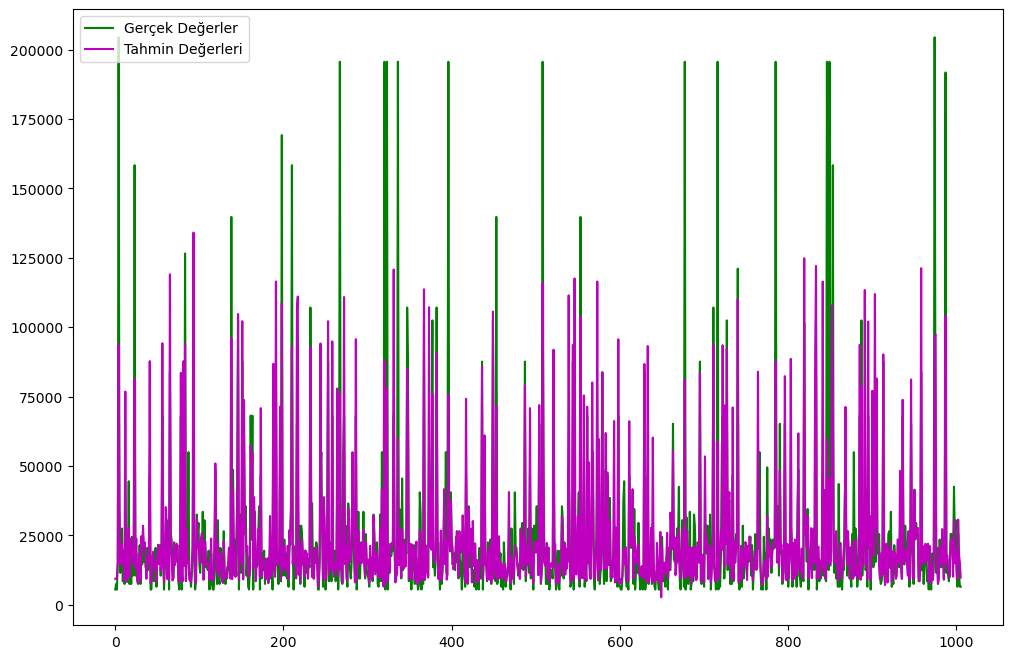

In [6]:
# figure size
plt.figure(figsize=(12, 8))

# actual values
plt.plot([i for i in range(len(y_test))], y_test, c='g', label="Gerçek Değerler")

# predicted values
plt.plot([i for i in range(len(y_test))], y_pred, c='m', label="Tahmin Değerleri")
plt.legend()
plt.show()

**Train Seti RMSE**

In [7]:
y_pred = lgbm_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))    # 14625.7623

14625.762319281721

**Train Seti R-Kare**

In [8]:
lgbm_model.score(X_train, y_train)  # 0.75

0.7545711008072727

**Test Seti RMSE Değeri**

In [10]:
y_pred = lgbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))     # 19272

19272.12913814892

**Test Seti R-Kare Skoru**

In [11]:
# 1. YOL
# print(lgbm_model.score(X_test, y_test))

# 2. YOL
print('R score is :', r2_score(y_test, y_pred))     # 0.57

R score is : 0.5732778753915976


### 3. Hiperparametre Optimizasyonu

Let us also create a validation function that will validate the models based on the cross-validation method.

In [12]:
# function for the validation of model
def evaluate_model(model, Input, Output):
    
    # defining the method of validation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
    
    # validating the model based on the accuracy score
    r_square = cross_val_score(model, Input, Output, scoring='r2', cv=cv, n_jobs=-1)
    
    # returning the accuracy score
    return r_square

**GridSearchCV in LightGBM to get optimum values for parameters**

GridSearchCV is an algorithm that takes different values for the specified parameters and then returns the optimum combinations. Let us apply the GridSearchCV to find the optimum values for parameters in LightGBM.

Let us first create a LightGBM model and then initialize a range of values for different parameters.

In [15]:
# creating a dict of grids
grid = dict()

# values for iteration
grid['n_estimators'] = [10, 25, 50, 75, 100, 300, 500, 700, 1000]

# values for learning rate
grid['learning_rate'] = [0.01, 0.03, 0.05, 0.06, 0.07, 0.08, 0.1, 1.0]

# values for the sample
grid['subsample'] = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]

# values for the depth of tree
grid['max_depth'] = [1, 2, 3, 4, 5]

Let us now use the GridSearchCV to find the optimum values for the parameters.

In [16]:
# defining the cv
cv = RepeatedStratifiedKFold(n_repeats=3)

# applying the gridsearchcv method
grid_search = GridSearchCV(estimator=lgbm_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='r2')

# storing the values
grid_result = grid_search.fit(X, y)

# printing the best parameters
print("Accuracy score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Accuracy score: 0.634578 using {'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 700, 'subsample': 0.1}


**Bulunan en iyi parametre değerleri**

In [17]:
grid_result.best_params_    # Skor: 0.63
# {'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 700, 'subsample': 0.1}

{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 700, 'subsample': 0.1}

In [21]:
lgbm_final = lgbm_model.set_params(**grid_result.best_params_).fit(X, y)

### 4. Final Model Başarı Değerlendirme

Bakalım yaptığımız değişiklikler model başarısını nasıl etkilemiş

In [22]:
# RMSE
np.mean(np.sqrt(-cross_val_score(lgbm_final,
                                 X,                     # Bağımsız değişkenler
                                 y.values.ravel(),      # Bağımlı değişken
                                 cv=5,
                                 scoring="neg_mean_squared_error")))
# 17780.82

17780.819843477773

In [23]:
# R-Kare
lgbm_final.score(X_test, y_test)   # 0.63

0.6333315800555048

In [24]:
# CV yoluyla R-Kare
np.mean(cross_val_score(lgbm_final,
                        X,                      # Bağımsız değişkenler
                        y.values.ravel(),       # Bağımlı değişken
                        cv=5,
                        scoring='r2'))
# 0.63

0.6342812162670177

### 5. Tahmin

In [25]:
# Veri setinden rasgele bir gözlem birimi seçelim
ran_obs = df.sample(1)
ran_obs

,LEVEL,POSITION_CTO,POSITION_DATA SCIENTIST,POSITION_DATABASE ADMIN,POSITION_DEVOPS ENGINEER,POSITION_EMBEDDED SOFTWARE DEVELOPER,POSITION_FRONT-END DEVELOPER,POSITION_FULL STACK DEVELOPER,POSITION_GAME DEVELOPER,POSITION_MOBILE APPLICATION DEVELOPER,...,COMPANY_Yazılım & Teknoloji,WORK_TYPE_Geçici Remote,WORK_TYPE_Hibrit,WORK_TYPE_Ofis,WORK_TYPE_Remote,CITY_yurt_ici,CURRENCY_GBP,CURRENCY_TRY,CURRENCY_USD,SALARY_AVG_TL
2087,2,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,20499


In [26]:
# Hedef değişken hariç diğerlerine ait gözlem değerlerini alalım
ran_obs_ind = ran_obs.loc[:, df.columns != 'SALARY_AVG_TL']
ran_obs_ind

,LEVEL,POSITION_CTO,POSITION_DATA SCIENTIST,POSITION_DATABASE ADMIN,POSITION_DEVOPS ENGINEER,POSITION_EMBEDDED SOFTWARE DEVELOPER,POSITION_FRONT-END DEVELOPER,POSITION_FULL STACK DEVELOPER,POSITION_GAME DEVELOPER,POSITION_MOBILE APPLICATION DEVELOPER,...,COMPANY_Startup,COMPANY_Yazılım & Teknoloji,WORK_TYPE_Geçici Remote,WORK_TYPE_Hibrit,WORK_TYPE_Ofis,WORK_TYPE_Remote,CITY_yurt_ici,CURRENCY_GBP,CURRENCY_TRY,CURRENCY_USD
2087,2,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0


In [27]:
# Bu gözlem birimi için tahmin işlemi yapalım
pred_val = int(lgbm_final.predict(ran_obs_ind))

In [28]:
# Sonuçları mukayese edelim
print(f"ACTUAL VALUE\t: {int(ran_obs['SALARY_AVG_TL'].values)}")
print(f"PREDICTED VALUE\t: {pred_val}")

ACTUAL VALUE	: 20499
PREDICTED VALUE	: 20885


Son olarak gerçek değerler ile tahmin değerlerini ayrı bir veri setinde birleştirelim

In [29]:
df_final = pd.DataFrame()   # Yeni bir df tanımla
df_final["ACTUAL_AVG_TL"] = df["SALARY_AVG_TL"]     # Gerçek değerleri bir değişken olarak ekle

In [31]:
# Tüm gözlem birimleri için tahmin işlemi yapıp sonuçları sakla
y_pred_all = lgbm_final.predict(X)

In [36]:
# Veri setine bu tahmin değerlerini ikinci bir değişken olarak ekle
df_final["PREDICTED_AVG_TL"] = y_pred_all
df_final["PREDICTED_AVG_TL"] = df_final["PREDICTED_AVG_TL"].astype("int")

In [37]:
# Bu veri setinden rasgele 20 gözlemlik bir örneklem al, indekse göre sıralayarak göster
df_final.sample(20).sort_index()

,ACTUAL_AVG_TL,PREDICTED_AVG_TL
696,7499,7226
1021,20499,15255
1052,8499,7226
1376,8499,8013
1417,35499,41167
1680,13499,20727
1746,14499,8247
1917,19499,20885
2039,16499,13722
2280,29499,26999
